## Real Estate Valuation - Taiwan

### Goal of this notebook: 
The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 
The real estate valuation is a regression problem and the goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

### Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

### Attribute Information:
The inputs are as follows 

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow 
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

### Load data...

In [1]:
from pandas import read_excel #Import the package read_excel from pandas
file_name = 'Real estate valuation data set.xlsx' # name of the excel file
df = read_excel(file_name)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.describe() #Lets take an overview of the Stats 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Simplify the colums label for a better manipulation

In [3]:
df.columns.values

array(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], dtype=object)

In [4]:
#Lets remove the comment on the labels and keep only the Xs
df = df.rename(columns={'X1 transaction date': 'X1', 'X2 house age': 'X2', 
                        'X3 distance to the nearest MRT station': 'X3',
                        'X4 number of convenience stores': 'X4', 'X5 latitude':'X5', 
                        'X6 longitude' : 'X6'})

### House Price Dispersion

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'fig1: Distribution of the house price of unit area')

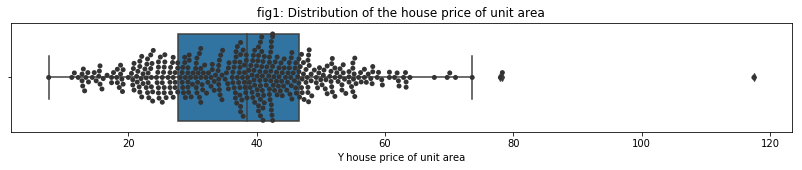

In [6]:
#Visualisation of the house prices throughout the dataset
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df['Y house price of unit area'])
sns.swarmplot(df['Y house price of unit area'], color='.20')
plt.title('fig1: Distribution of the house price of unit area')

###  Correlation Matrix between the Inputs

Text(0.5,1,'fig2: Correlation Matrix between the Inputs')

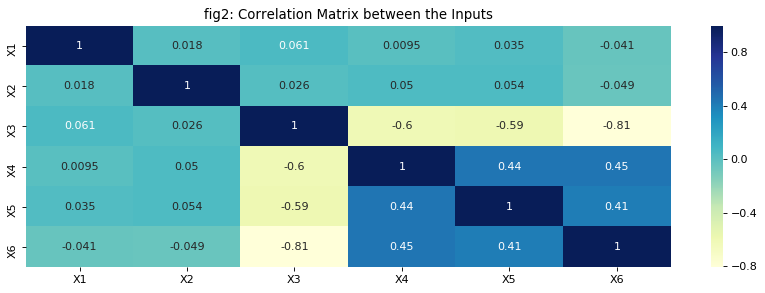

In [7]:
fig, ax = plt.subplots(figsize=(13,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",
           annot=True)
plt.title('fig2: Correlation Matrix between the Inputs')

#### Observations: 

X5 and X6 are highly correlated.

### Correlation between the Inputs and the dependant Variable (House Price)

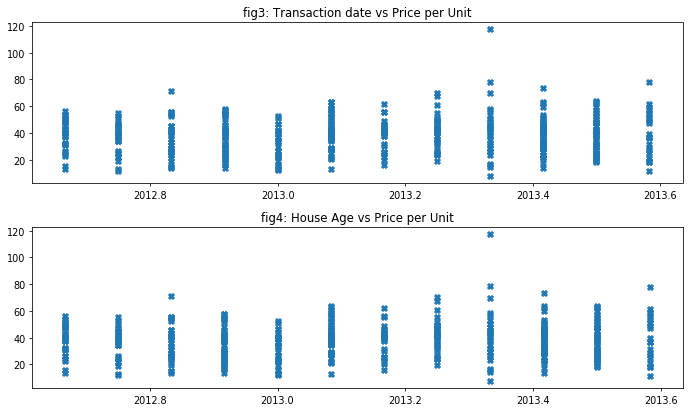

In [8]:
#Parameter of the graphs
fig = plt.figure(figsize=(10,6), dpi=70)
#Transaction date vs Price per Unit
plt.subplot(2,1,1)
x1 = df['X1']
y = df['Y house price of unit area'];plt.scatter(x1,y, marker='X')
plt.title('fig3: Transaction date vs Price per Unit')
plt.tight_layout()
#House Age vs Price per Unit
plt.subplot(2,1,2)
x2 = df['X2']
y = df['Y house price of unit area'];plt.scatter(x1,y, marker='X')
plt.title('fig4: House Age vs Price per Unit')
plt.tight_layout()

Text(0.5,1,'fig5: Nbr of store vs Price per Unit')

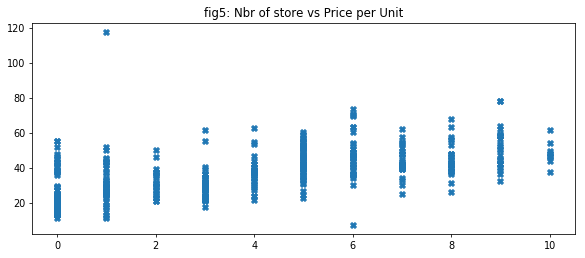

In [9]:
#Nbr of stores vs Price per Unit
fig = plt.figure(figsize=(10,4), dpi=70)
x4 = df['X4']
y = df['Y house price of unit area'];plt.scatter(x4,y, marker='X')
plt.title('fig5: Nbr of stores vs Price per Unit')

Referring to the plot of fig3, fig4 and fig5, the transactions date X1, the House Age X2 and the number of convenience stores in the living circle X4 are not correlated to the house price of unit area. Therefore, all these 3 Inputs will not be relevant to our analysis.


Text(0.5,1,'fig6: Distance to the nearest MRT vs Price per Unit')

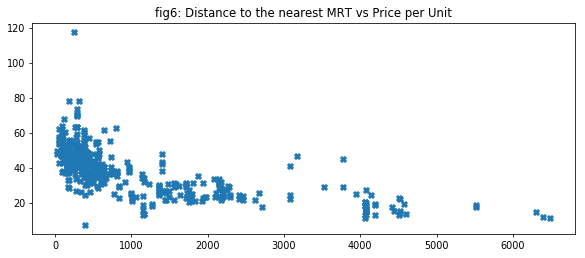

In [10]:
#Distance to the nearest MRT station vs Price per Unit
fig = plt.figure(figsize=(10,4), dpi=70)
x3 = df['X3']
y = df['Y house price of unit area'];plt.scatter(x3,y, marker='X')
plt.title('fig6: Distance to the nearest MRT vs Price per Unit')

Looking to the fig6, it looks like more the house is near to the MRT station, the house price of unit area tend to be higher. This figure, shows a relationship between the input X3 and the ouput Y. Therefore, this variable will be very interesting to our analysis.

Text(0.5,0.92,'fig7: Location vs Price per Unit')

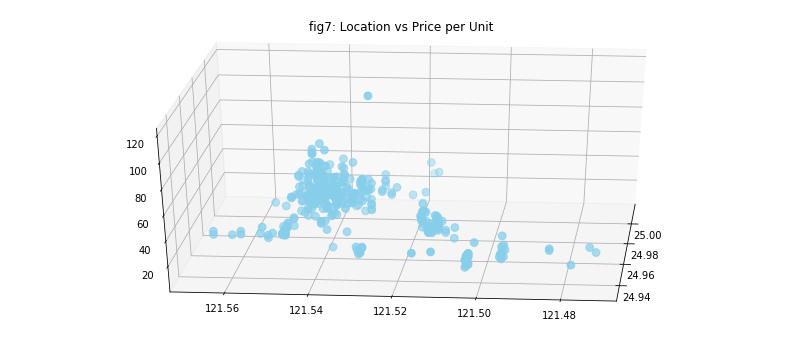

In [11]:
#The location vs Price per Unit
from mpl_toolkits.mplot3d import Axes3D
x5 = df['X5'] #Latitude
x6 = df['X6'] #Longitude
y = df['Y house price of unit area']

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x5,x6,y, c='skyblue', s=60)
ax.view_init(30, 185)
plt.title('fig7: Location vs Price per Unit')